In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cs_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/credit.csv')

In [4]:
pd.set_option('display.max_columns', 50)

In [6]:
cs_df.head(3)

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089,Good
1,0x160e,CUS_0x21b1,Rick Rothackerj,28_,004-07-5839,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4,2.0,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627,Standard
2,0x161a,CUS_0x2dbc,Langep,34,486-85-3974,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,3.0,1303.01,28.616735,17 Years and 9 Months,No,246.992320,168.4137027,!@9#%8,1043.315978,Good


In [8]:
cs_df1 = cs_df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis= 1)

In [9]:
cs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [12]:
cs_df1['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [13]:
cs_df1['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [9]:
cs_df1['Credit_Score'] = cs_df1['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good': 2})

In [16]:
cs_df1.describe()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Credit_Score
count,12500.000000,12500.000000,12500.00000,12500.000000,12264.000000,12500.000000,12500.000000,12366.000000,12500.000000
mean,17.275120,21.647680,69.46520,21.051440,24.591650,32.291949,1303.781040,405.815391,0.871440
std,118.518214,123.789969,455.95698,14.859994,183.422458,5.084327,8118.261086,218.136964,0.654268
min,0.000000,1.000000,1.00000,-5.000000,0.000000,20.992914,0.000000,0.088628,0.000000
25%,3.000000,4.000000,8.00000,10.000000,2.000000,28.110034,29.128806,271.785749,0.000000
50%,6.000000,5.000000,13.00000,18.000000,4.000000,32.297912,66.372879,337.169588,1.000000
75%,7.000000,7.000000,20.00000,28.000000,8.000000,36.458660,149.904496,475.222487,1.000000
max,1779.000000,1479.000000,5788.00000,67.000000,2592.000000,49.564519,82122.000000,1602.040519,2.000000


<Axes: xlabel='Payment_of_Min_Amount', ylabel='Credit_Score'>

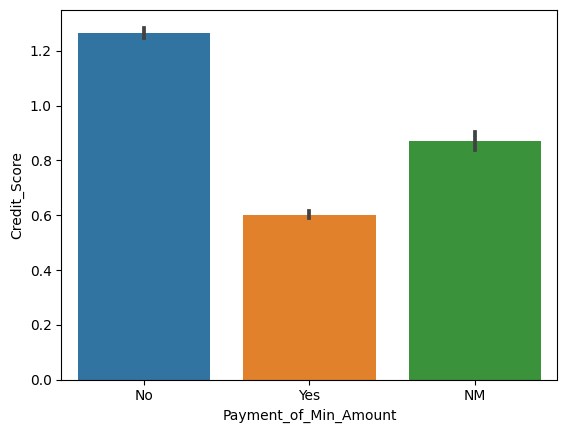

In [17]:
sns.barplot(x= 'Payment_of_Min_Amount', y= 'Credit_Score', data= cs_df1)

<Axes: xlabel='Occupation', ylabel='Credit_Score'>

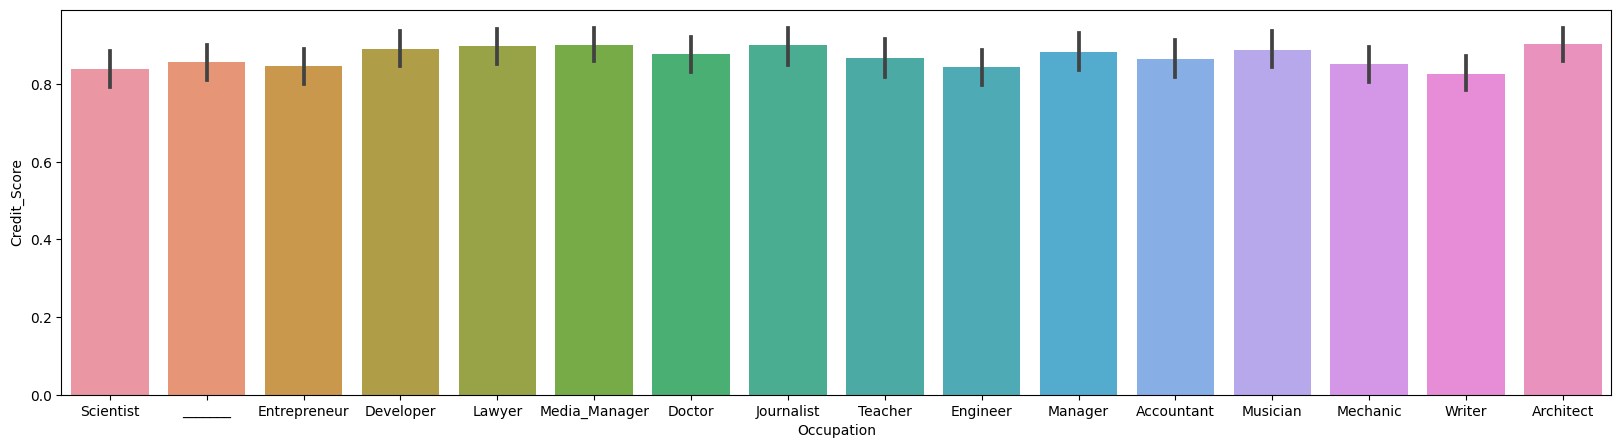

In [20]:
plt.figure(figsize= (20, 5))
sns.barplot(x= 'Occupation', y= 'Credit_Score', data= cs_df1)

<ipython-input-23-417bf5c14b52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs_df1.corr(), cmap= 'coolwarm', vmin= -1, vmax= 1, annot= True)


<Axes: >

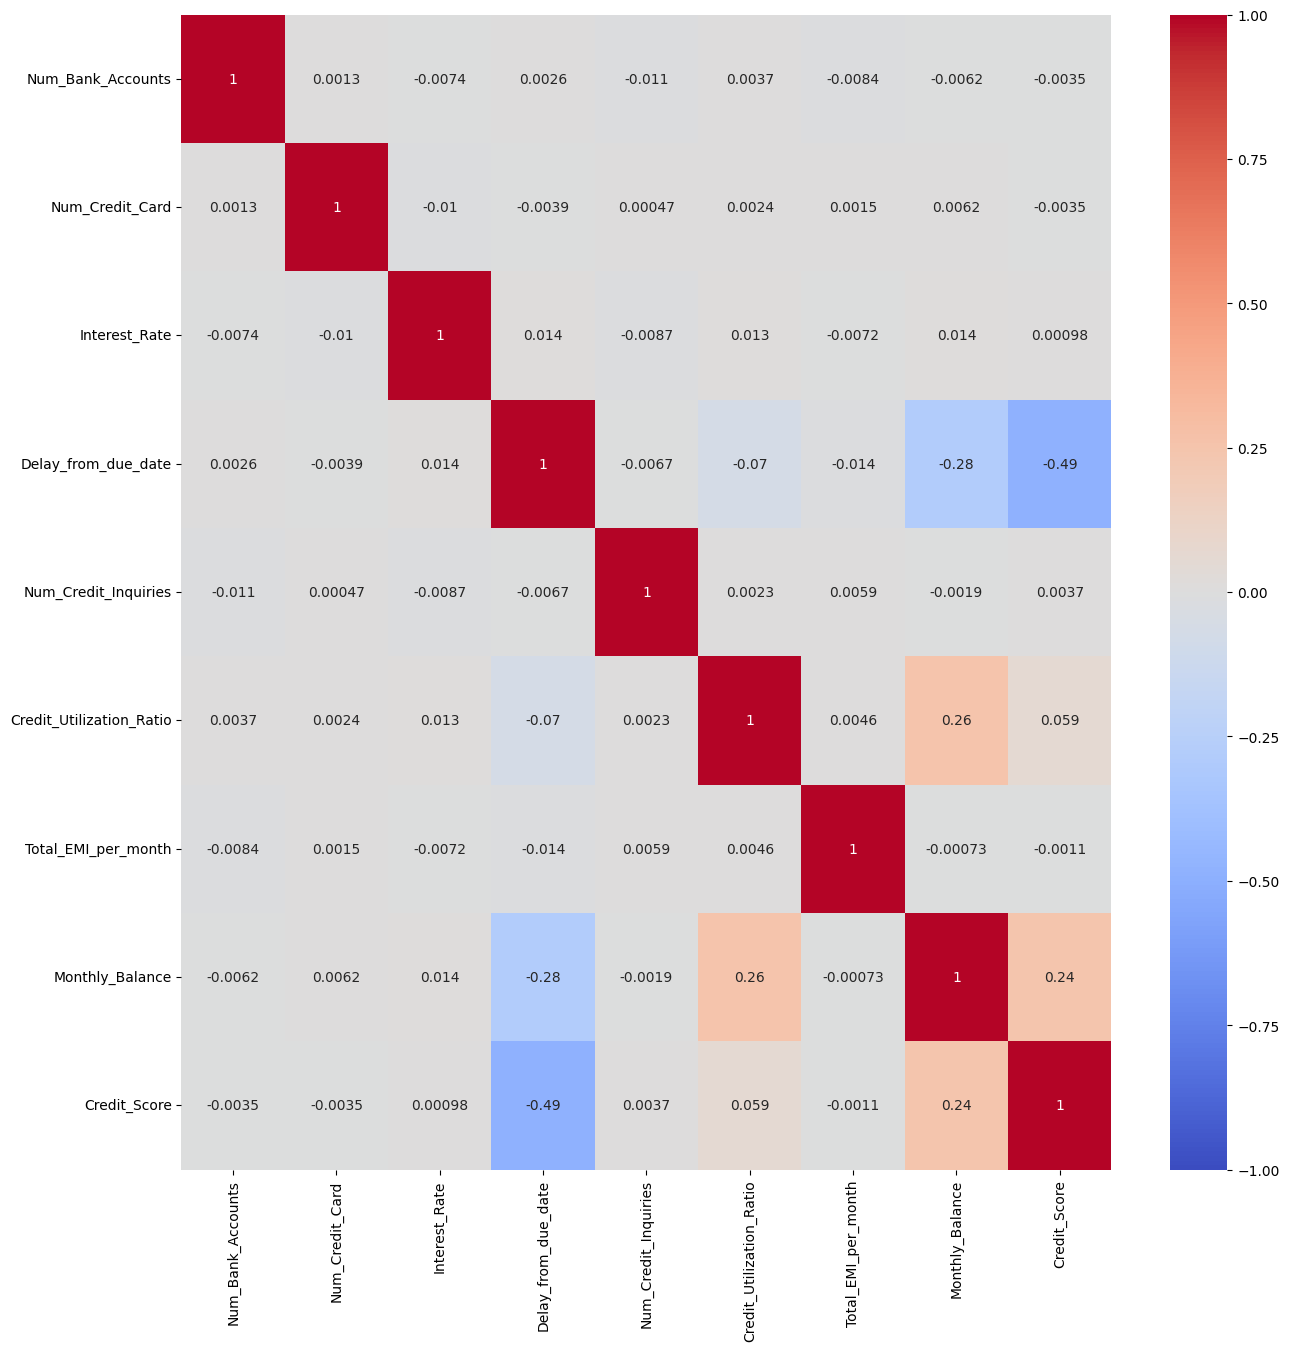

In [23]:
plt.figure(figsize= (15, 15))
sns.heatmap(cs_df1.corr(), cmap= 'coolwarm', vmin= -1, vmax= 1, annot= True)

# Data Cleaning

In [24]:
cs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  object 
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  object 
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  object 
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  object 
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  object 
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [10]:
for i in cs_df1.columns:
  if cs_df1[i].dtype == 'O':
    print(i)

Age
Occupation
Annual_Income
Num_of_Loan
Type_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Credit_History_Age
Payment_of_Min_Amount
Amount_invested_monthly
Payment_Behaviour


In [ ]:
Age
Annual_Income
Num_of_Loan
Num_of_Delayed_Payment
Outstanding_Debt
Amount_invested_monthly

In [12]:
for i in ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Amount_invested_monthly']:
  cs_df1[i] = pd.to_numeric(cs_df1[i].str.replace('_', ''))

In [39]:
cs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12500 non-null  int64  
 1   Occupation                12500 non-null  object 
 2   Annual_Income             12500 non-null  float64
 3   Num_Bank_Accounts         12500 non-null  int64  
 4   Num_Credit_Card           12500 non-null  int64  
 5   Interest_Rate             12500 non-null  int64  
 6   Num_of_Loan               12500 non-null  int64  
 7   Type_of_Loan              11074 non-null  object 
 8   Delay_from_due_date       12500 non-null  int64  
 9   Num_of_Delayed_Payment    11657 non-null  float64
 10  Num_Credit_Inquiries      12264 non-null  float64
 11  Outstanding_Debt          12500 non-null  float64
 12  Credit_Utilization_Ratio  12500 non-null  float64
 13  Credit_History_Age        11387 non-null  object 
 14  Paymen

In [13]:
cs_df1['Credit_History_Age'] = cs_df1['Credit_History_Age'].str.replace(' Months', '')

In [14]:
cs_df1['Credit_History_Age'] = pd.to_numeric(cs_df1['Credit_History_Age'].str.split('Years and', expand = True)[0]) * 12 + pd.to_numeric(cs_df1['Credit_History_Age'].str.split('Years and', expand = True)[1])

In [48]:
cs_df1.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,12500.000000,1.250000e+04,12500.000000,12500.000000,12500.00000,12500.00000,12500.000000,11657.000000,12264.000000,12500.000000,12500.000000,11387.000000,12500.000000,11935.000000,12366.000000,12500.000000
mean,113.371280,1.888617e+05,17.275120,21.647680,69.46520,3.43656,21.051440,31.280089,24.591650,1426.220376,32.291949,217.588127,1303.781040,643.291976,405.815391,0.871440
std,691.223297,1.482707e+06,118.518214,123.789969,455.95698,65.35565,14.859994,229.911798,183.422458,1155.169458,5.084327,99.638681,8118.261086,2063.324328,218.136964,0.654268
min,-500.000000,7.005930e+03,0.000000,1.000000,1.00000,-100.00000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.948777e+04,3.000000,4.000000,8.00000,1.00000,10.000000,9.000000,2.000000,566.072500,28.110034,141.000000,29.128806,73.810753,271.785749,0.000000
50%,33.000000,3.765508e+04,6.000000,5.000000,13.00000,3.00000,18.000000,14.000000,4.000000,1166.155000,32.297912,215.000000,66.372879,134.201478,337.169588,1.000000
75%,42.000000,7.289813e+04,7.000000,7.000000,20.00000,5.00000,28.000000,18.000000,8.000000,1945.962500,36.458660,298.000000,149.904496,264.555831,475.222487,1.000000
max,8592.000000,2.365819e+07,1779.000000,1479.000000,5788.00000,1496.00000,67.000000,4388.000000,2592.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [15]:
cs_df1= cs_df1[cs_df1['Age'] >= 0]

In [55]:
cs_df1.sort_values('Age').tail(50)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3030,6796,Accountant,32401.400,8,5,29,6,"Payday Loan, Mortgage Loan, Payday Loan, Payda...",41,22.0,8.0,4607.43,32.353246,107.0,Yes,14741.000000,10000.000000,Low_spent_Large_value_payments,284.685362,0
582,6846,Accountant,10299.565,5,9,28,2,"Auto Loan, and Not Specified",22,19.0,8.0,1710.58,37.571471,175.0,Yes,8.724971,30.547856,Low_spent_Small_value_payments,321.956882,0
5559,6863,Mechanic,58416.360,6,6,29,5,"Credit-Builder Loan, Home Equity Loan, Mortgag...",52,27.0,11.0,1300.14,32.375318,135.0,Yes,224.204701,248.985936,High_spent_Small_value_payments,274.512363,0
8885,6902,Musician,116742.540,5,3,10,2,"Payday Loan, and Credit-Builder Loan",5,4.0,2.0,295.19,30.488264,335.0,No,186.726035,227.470733,High_spent_Large_value_payments,818.257732,2
7773,6909,_______,36825.110,5,3,9,1,Mortgage Loan,28,12.0,1.0,520.36,27.670760,219.0,No,24.319836,103.993523,Low_spent_Medium_value_payments,451.462558,0
5093,6971,Mechanic,70709.040,7,6,20,6,"Home Equity Loan, Mortgage Loan, Student Loan,...",9,15.0,5.0,805.64,22.985417,NaN,Yes,260.883512,203.693569,High_spent_Medium_value_payments,344.664919,1
3257,6995,Teacher,126530.400,1,5,5,2,"Credit-Builder Loan, and Auto Loan",18,3.0,3.0,953.26,27.883289,333.0,No,140.492402,183.181709,High_spent_Large_value_payments,969.845888,2
4678,7014,Scientist,85486.140,6,4,13,3,"Not Specified, Student Loan, and Not Specified",20,6.0,3.0,380.26,39.843984,313.0,Yes,177.172430,245.061798,High_spent_Medium_value_payments,568.950272,1
9916,7171,Teacher,30951.640,9,5,26,7,"Credit-Builder Loan, Student Loan, Home Equity...",34,18.0,6.0,4972.87,39.246981,109.0,Yes,103.030041,95.670699,Low_spent_Small_value_payments,320.429593,1
2105,7197,Manager,10640.355,6,3,13,2,"Credit-Builder Loan, and Credit-Builder Loan",14,18.0,3.0,76.19,29.374412,281.0,Yes,17.315030,68.909662,Low_spent_Large_value_payments,295.344933,1


<Axes: ylabel='Age'>

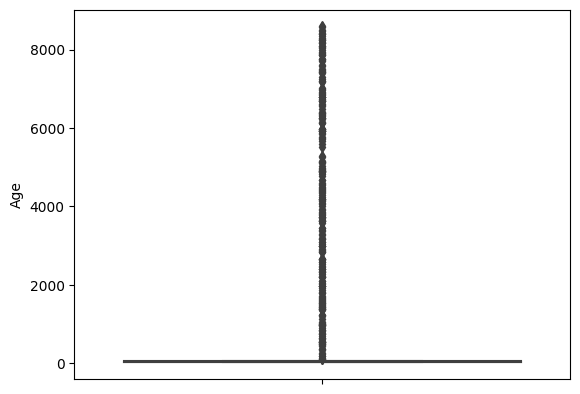

In [57]:
sns.boxplot(y= cs_df1['Age'])

In [58]:
cs_df1[cs_df1['Age'] > 80].sort_values('Age')

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4781,95,Engineer,46162.62,10,5,16,2,"Personal Loan, and Debt Consolidation Loan",43,19.0,6.0,1788.63,35.386419,185.0,Yes,65.956819,288.645844,Low_spent_Small_value_payments,290.285837,1
3911,102,Musician,38460.28,6,9,16,7,"Personal Loan, Personal Loan, Home Equity Loan...",56,16.0,11.0,4106.50,26.537577,73.0,Yes,179.135821,267.336505,Low_spent_Medium_value_payments,157.630007,1
2416,126,Teacher,22050.56,5,4,12,1,Home Equity Loan,5,13.0,4.0,37.42,28.956967,387.0,NM,13.485884,NaN,High_spent_Medium_value_payments,359.927004,1
7418,169,Doctor,50109.76,6,3,4,1,Personal Loan,16,17.0,0.0,893.62,27.560776,191.0,NM,22.847438,351.547678,Low_spent_Large_value_payments,331.086217,2
952,181,_______,87957.02,2,5,9,4,"Home Equity Loan, Auto Loan, Credit-Builder Lo...",9,1.0,2.0,811.01,41.470014,231.0,No,195.913703,265.660815,High_spent_Medium_value_payments,533.800649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,8425,Writer,18512.97,7,5,18,3,"Student Loan, Student Loan, and Mortgage Loan",15,11.0,6.0,1366.56,29.253092,131.0,Yes,24.621173,63.282651,High_spent_Medium_value_payments,311.570927,1
11218,8481,Journalist,15874.01,1,3,5,0,NaN,12,6.0,1.0,1173.38,24.443887,380.0,No,0.000000,53.610174,High_spent_Small_value_payments,311.373243,0
12439,8490,Lawyer,150131.68,5,1,4,0,NaN,8,-2.0,0.0,1138.36,30.013470,376.0,No,0.000000,949.847265,Low_spent_Small_value_payments,599.850069,1
9255,8587,Journalist,28286.24,4,7,7,1,Mortgage Loan,18,16.0,4.0,1406.94,33.599043,350.0,No,17.431672,41.114532,High_spent_Medium_value_payments,418.772462,1


In [16]:
cs_df1 = cs_df1[cs_df1['Age'] < 120]

In [61]:
len(cs_df1[cs_df1['Num_Bank_Accounts'] > 15]) / len(cs_df1)

0.013029853207982847

In [17]:
cs_df1 = cs_df1[cs_df1['Num_Bank_Accounts'] <= 15]

In [65]:
len(cs_df1[cs_df1['Num_Credit_Card'] > 20]) / len(cs_df1)

0.021975267379679145

In [18]:
cs_df1 = cs_df1[cs_df1['Num_Credit_Card'] <= 20]

In [19]:
cs_df1 = cs_df1[cs_df1['Num_Credit_Inquiries'] <= 30]

In [70]:
cs_df1.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,11301.000000,1.130100e+04,11301.000000,11301.000000,11301.000000,11301.000000,11301.000000,10529.000000,11301.000000,11301.000000,11301.000000,10288.000000,11301.000000,10799.000000,11183.000000,11301.000000
mean,33.069551,1.896992e+05,5.375365,5.534466,68.918326,3.017078,21.140165,31.888308,4.940448,1427.035825,32.280625,217.045879,1293.999055,641.328024,405.913658,0.869569
std,10.800694,1.493010e+06,2.586960,2.072146,459.056906,62.671716,14.927874,233.830400,3.539648,1156.766703,5.078043,99.603869,8086.214868,2059.952475,218.073347,0.653225
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,-100.000000,-5.000000,-3.000000,0.000000,0.230000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.942803e+04,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,2.000000,563.280000,28.118877,140.000000,29.493261,73.165215,271.720168,0.000000
50%,33.000000,3.765418e+04,6.000000,5.000000,14.000000,3.000000,18.000000,14.000000,4.000000,1165.640000,32.263578,215.000000,66.378963,133.817110,336.865237,1.000000
75%,41.000000,7.309984e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1952.970000,36.424314,297.000000,150.127779,263.512707,475.561199,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,5788.000000,1480.000000,67.000000,4388.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [20]:
cs_df1 = cs_df1[cs_df1['Num_of_Loan'] >= 0]

<Axes: ylabel='Num_of_Loan'>

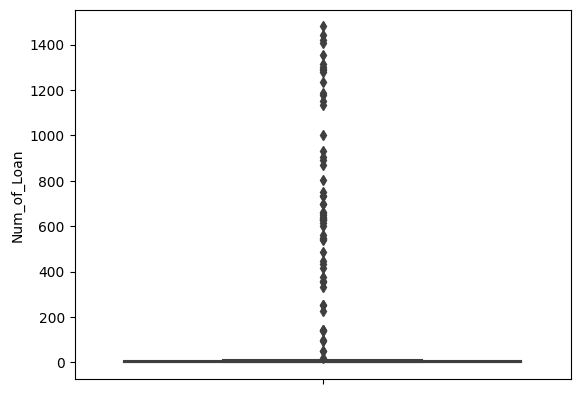

In [72]:
sns.boxplot(y= cs_df1['Num_of_Loan'])

In [21]:
cs_df1 = cs_df1[cs_df1['Num_of_Loan'] <= 10]

In [79]:
cs_df1.sort_values('Num_of_Delayed_Payment', ascending=False).head(30)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10279,50,Scientist,32637.880,5,5,10,3,"Not Specified, Personal Loan, and Payday Loan",24,4388.0,3.0,1061.77,35.623966,207.0,Yes,69.574057,27.566888,High_spent_Medium_value_payments,404.341388,1
12248,22,Engineer,32776.720,9,9,32,9,"Home Equity Loan, Mortgage Loan, Debt Consolid...",52,4292.0,7.0,3270.52,29.612803,8.0,Yes,1170.000000,218.510363,Low_spent_Large_value_payments,124.002356,1
7153,43,_______,15427.215,0,3,8,4,"Mortgage Loan, Auto Loan, Not Specified, and S...",13,4251.0,4.0,966.45,28.414918,379.0,No,48.816834,14.222500,High_spent_Large_value_payments,302.320791,1
5044,32,Mechanic,29349.000,7,6,17,2,"Payday Loan, and Mortgage Loan",28,4191.0,1.0,1419.52,32.073631,235.0,No,45.313526,92.291326,Low_spent_Large_value_payments,376.670147,1
8876,24,Developer,133538.680,3,7,12,0,NaN,9,4169.0,3.0,1389.91,30.585129,286.0,No,0.000000,10000.000000,High_spent_Large_value_payments,1240.020123,1
5203,28,Writer,101203.000,8,4,6,4,"Not Specified, Payday Loan, Credit-Builder Loa...",25,4135.0,1.0,598.94,36.596951,287.0,NM,278.907320,133.281744,High_spent_Large_value_payments,695.369269,1
5440,51,Musician,22313.780,1,3,1,0,NaN,-4,4077.0,2.0,904.47,36.855926,283.0,No,0.000000,29.475324,High_spent_Large_value_payments,404.172843,1
2475,49,Doctor,38217.600,6,6,13,2,"Not Specified, and Auto Loan",18,4022.0,1.0,448.54,24.571317,265.0,No,57.881717,174.384551,Low_spent_Small_value_payments,378.213732,1
5579,31,Teacher,16972.370,6,10,17,5,"Home Equity Loan, Mortgage Loan, Mortgage Loan...",54,3978.0,11.0,4348.66,38.322276,95.0,Yes,48.916557,169.018410,Low_spent_Small_value_payments,209.901449,1
7817,19,Journalist,23265.780,7,4,16,2,"Home Equity Loan, and Personal Loan",6,3919.0,0.0,1092.14,33.156716,213.0,Yes,28.838541,129.214251,Low_spent_Small_value_payments,342.328709,1


In [22]:
cs_df1 = cs_df1[cs_df1['Num_of_Delayed_Payment'] <= 30]

In [23]:
cs_df1 = cs_df1[cs_df1['Interest_Rate'] <= 40]

In [24]:
cs_df1 = cs_df1[cs_df1['Delay_from_due_date'] >= 0]
cs_df1 = cs_df1[cs_df1['Num_of_Delayed_Payment'] >= 0]

In [91]:
cs_df1.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,9661.000000,9.661000e+03,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,8794.000000,9661.000000,9226.000000,9559.000000,9661.000000
mean,32.970086,1.983977e+05,5.414139,5.552634,14.706345,3.569299,21.346651,13.475106,5.006625,1437.454665,32.284488,215.772913,1328.671986,642.450542,403.900340,0.857675
std,10.829214,1.537373e+06,2.574923,2.067557,8.780743,2.448113,14.857655,6.202678,3.550954,1161.362182,5.089492,99.506541,8254.299956,2062.604271,215.817839,0.648880
min,14.000000,7.005930e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.340000,20.992914,1.000000,0.000000,0.000000,0.088628,0.000000
25%,24.000000,1.940340e+04,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,2.000000,568.810000,28.141571,139.000000,29.835762,72.580320,271.641528,0.000000
50%,33.000000,3.782218e+04,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,4.000000,1171.280000,32.234646,213.000000,66.378963,132.789653,336.653420,1.000000
75%,41.000000,7.260832e+04,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,8.000000,1978.100000,36.429434,296.000000,149.617718,265.078449,471.912118,1.000000
max,102.000000,2.365819e+07,10.000000,17.000000,34.000000,9.000000,67.000000,28.000000,12.000000,4998.070000,49.564519,397.000000,82122.000000,10000.000000,1602.040519,2.000000


In [92]:
cs_df1.isna().mean()

Age                         0.000000
Occupation                  0.000000
Annual_Income               0.000000
Num_Bank_Accounts           0.000000
Num_Credit_Card             0.000000
Interest_Rate               0.000000
Num_of_Loan                 0.000000
Type_of_Loan                0.111479
Delay_from_due_date         0.000000
Num_of_Delayed_Payment      0.000000
Num_Credit_Inquiries        0.000000
Outstanding_Debt            0.000000
Credit_Utilization_Ratio    0.000000
Credit_History_Age          0.089742
Payment_of_Min_Amount       0.000000
Total_EMI_per_month         0.000000
Amount_invested_monthly     0.045026
Payment_Behaviour           0.000000
Monthly_Balance             0.010558
Credit_Score                0.000000
dtype: float64

In [94]:
cs_df1[cs_df1['Num_of_Loan'] == 0]['Type_of_Loan'].unique()

array([nan], dtype=object)

In [25]:
cs_df1['Type_of_Loan'] = cs_df1['Type_of_Loan'].fillna('No_Loan')

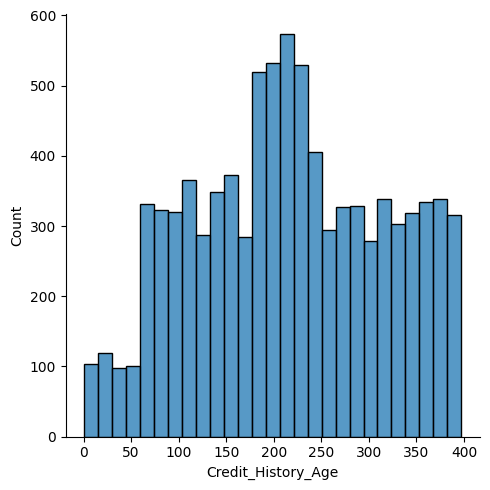

In [96]:
sns.displot(cs_df1['Credit_History_Age'])

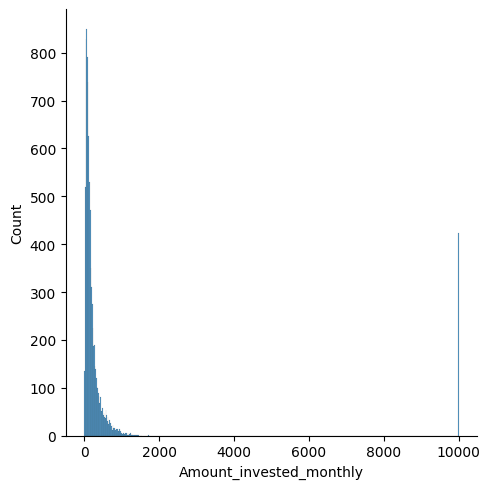

In [97]:
sns.displot(cs_df1['Amount_invested_monthly'])

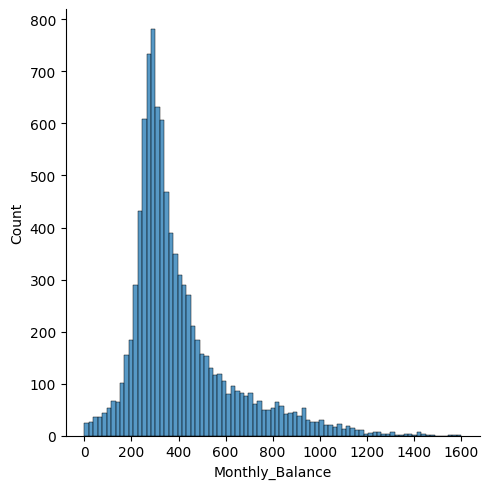

In [98]:
sns.displot(cs_df1['Monthly_Balance'])

In [26]:
cs_df1 = cs_df1.fillna(cs_df1.median())

<ipython-input-26-ca2ec3c73e13>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cs_df1 = cs_df1.fillna(cs_df1.median())


In [100]:
cs_df1.isna().mean()

Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Num_Credit_Inquiries        0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

# 텍스트 데이터 처리

In [101]:
cs_df1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,28,_______,34847.84,2,4,6,1,Credit-Builder Loan,3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1
2,34,_______,143162.64,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2
3,54,Entrepreneur,30689.89,2,5,4,1,Not Specified,0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1
6,33,Lawyer,131313.40,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2


In [27]:
cs_df1['Type_of_Loan'] = cs_df1['Type_of_Loan'].str.replace('and ', '')

In [28]:
Type_List = set(cs_df1['Type_of_Loan'].str.split(', ').sum())

In [29]:
cs_df1['Type_of_Loan'] = cs_df1['Type_of_Loan'].str.split(', ')

In [30]:
for i in Type_List:
  cs_df1[i] = cs_df1['Type_of_Loan'].apply(lambda x: 1 if i in x else 0)

In [112]:
cs_df1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Mortgage Loan,Not Specified,Home Equity Loan,Student Loan,Credit-Builder Loan,No_Loan,Personal Loan,Payday Loan,Debt Consolidation Loan,Auto Loan
0,23,Scientist,19114.12,3,4,3,4,"[Auto Loan, Credit-Builder Loan, Personal Loan...",3,7.0,4.0,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2,0,0,1,0,1,0,1,0,0,1
1,28,_______,34847.84,2,4,6,1,[Credit-Builder Loan],3,4.0,2.0,605.03,24.464031,319.0,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1,0,0,0,0,1,0,0,0,0,0
2,34,_______,143162.64,1,5,8,3,"[Auto Loan, Auto Loan, Not Specified]",5,8.0,3.0,1303.01,28.616735,213.0,No,246.992320,168.413703,!@9#%8,1043.315978,2,0,1,0,0,0,0,0,0,0,1
3,54,Entrepreneur,30689.89,2,5,4,1,[Not Specified],0,6.0,4.0,632.46,26.544229,207.0,No,16.415452,81.228859,Low_spent_Large_value_payments,433.604773,1,0,1,0,0,0,0,0,0,0,0
6,33,Lawyer,131313.40,0,1,8,2,"[Credit-Builder Loan, Mortgage Loan]",0,3.0,2.0,352.16,32.200509,367.0,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,2,1,0,0,0,1,0,0,0,0,0


In [31]:
cs_df1.drop('Type_of_Loan', axis= 1, inplace= True)

In [114]:
cs_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9661 entries, 0 to 12498
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9661 non-null   int64  
 1   Occupation                9661 non-null   object 
 2   Annual_Income             9661 non-null   float64
 3   Num_Bank_Accounts         9661 non-null   int64  
 4   Num_Credit_Card           9661 non-null   int64  
 5   Interest_Rate             9661 non-null   int64  
 6   Num_of_Loan               9661 non-null   int64  
 7   Delay_from_due_date       9661 non-null   int64  
 8   Num_of_Delayed_Payment    9661 non-null   float64
 9   Num_Credit_Inquiries      9661 non-null   float64
 10  Outstanding_Debt          9661 non-null   float64
 11  Credit_Utilization_Ratio  9661 non-null   float64
 12  Credit_History_Age        9661 non-null   float64
 13  Payment_of_Min_Amount     9661 non-null   object 
 14  Total_E

In [115]:
cs_df1['Occupation'].value_counts()

_______          655
Lawyer           646
Mechanic         627
Engineer         617
Scientist        609
Architect        607
Developer        604
Teacher          603
Entrepreneur     596
Musician         594
Journalist       593
Accountant       592
Media_Manager    589
Doctor           588
Manager          578
Writer           563
Name: Occupation, dtype: int64

In [32]:
cs_df1['Occupation'] = cs_df1['Occupation'].replace('_______', 'Unknown')

In [119]:
cs_df1['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      2406
High_spent_Medium_value_payments    1743
High_spent_Large_value_payments     1407
Low_spent_Medium_value_payments     1334
High_spent_Small_value_payments     1098
Low_spent_Large_value_payments       955
!@9#%8                               718
Name: Payment_Behaviour, dtype: int64

In [33]:
cs_df1['Payment_Behaviour'] = cs_df1['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

# 더미 변수 변환

In [34]:
cs_df1 = pd.get_dummies(cs_df1, columns= ['Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount'])

In [123]:
cs_df1.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Mortgage Loan,Not Specified,Home Equity Loan,Student Loan,Credit-Builder Loan,No_Loan,Personal Loan,Payday Loan,Debt Consolidation Loan,...,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23,19114.12,3,4,3,4,3,7.0,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,28,34847.84,2,4,6,1,3,4.0,2.0,605.03,24.464031,319.0,18.816215,104.291825,470.690627,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,34,143162.64,1,5,8,3,5,8.0,3.0,1303.01,28.616735,213.0,246.992320,168.413703,1043.315978,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,54,30689.89,2,5,4,1,0,6.0,4.0,632.46,26.544229,207.0,16.415452,81.228859,433.604773,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,33,131313.40,0,1,8,2,0,3.0,2.0,352.16,32.200509,367.0,137.644605,378.171253,858.462474,2,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [1]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(cs_df1.drop('Credit_Score', axis= 1), cs_df1['Credit_Score'], test_size= 0.25, random_state= 100)

In [40]:
from lightgbm import LGBMClassifier

In [41]:
base_model = LGBMClassifier(random_state= 100)

In [42]:
base_model.fit(X_train, y_train)

LGBMClassifier(random_state=100)

In [43]:
pred1 = base_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [45]:
accuracy_score(y_test, pred1)

0.7363410596026491

In [46]:
confusion_matrix(y_test, pred1)

array([[ 516,  170,   36],
       [ 163, 1036,  123],
       [   7,  138,  227]])

In [47]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       722
           1       0.77      0.78      0.78      1322
           2       0.59      0.61      0.60       372

    accuracy                           0.74      2416
   macro avg       0.70      0.70      0.70      2416
weighted avg       0.74      0.74      0.74      2416



In [48]:
proba1 = base_model.predict_proba(X_test)

In [51]:
roc_auc_score(y_test, proba1, multi_class= 'ovr') #'ovr' 1:나머지, 'ovo' 1:1

0.9039833638520278

# Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [53]:
params = {'n_estimators': [100, 300, 500, 1000],
          'max_depth': [-1, 10, 30, 50]}

In [54]:
lgbm = LGBMClassifier(random_state= 100)

In [55]:
grid_lgbm = GridSearchCV(lgbm, params, cv = 3)

In [56]:
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=100),
             param_grid={'max_depth': [-1, 10, 30, 50],
                         'n_estimators': [100, 300, 500, 1000]})

In [57]:
grid_lgbm.best_params_

{'max_depth': -1, 'n_estimators': 100}

In [59]:
proba2 = grid_lgbm.predict_proba(X_test)

In [60]:
roc_auc_score(y_test, proba2, multi_class= 'ovr')

0.9039833638520278

In [61]:
params = {'n_estimators': [100, 500, 1000],
          'max_depth': [-1, 30, 50, 100],
          'num_leaves': [5, 10, 20, 50],
          'learning_rate' : [0.01, 0.05, 0.1, 0.5]
          }

In [63]:
rand_lgbm = RandomizedSearchCV(lgbm, params, cv = 3, n_iter= 30, random_state= 100)

In [64]:
rand_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=100), n_iter=30,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [-1, 30, 50, 100],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [5, 10, 20, 50]},
                   random_state=100)

In [65]:
rand_lgbm.best_params_

{'num_leaves': 5, 'n_estimators': 1000, 'max_depth': 50, 'learning_rate': 0.01}

In [66]:
proba3 = rand_lgbm.predict_proba(X_test)

In [67]:
roc_auc_score(y_test, proba3, multi_class= 'ovr')

0.9078610200221102